## Removed a Conv2D layer and a maxpooling layer-- scores decrease.

In [1]:
import os, shutil

In [2]:
base_dir = '/home/skhatter/dataset13'
train_dir = '/home/skhatter/dataset13/train'
valid_dir = '/home/skhatter/dataset13/valid'

train_dam_dir = '/home/skhatter/dataset13/train/damaged'
train_undam_dir = '/home/skhatter/dataset13/train/undamaged'

valid_dam_dir = '/home/skhatter/dataset13/valid/damaged'
valid_undam_dir = '/home/skhatter/dataset13/valid/undamaged'

In [3]:
print('Total training damaged images', len(os.listdir(train_dam_dir)))
print('Total training undamaged images', len(os.listdir(train_undam_dir)))

print('Total validation damaged images', len(os.listdir(valid_dam_dir)))
print('Total validation undamaged images', len(os.listdir(valid_undam_dir)))

Total training damaged images 160
Total training undamaged images 234
Total validation damaged images 53
Total validation undamaged images 80


In [4]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3,3), activation ='relu', input_shape = (512, 512, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(200, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(200, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 510, 510, 100)     2800      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 255, 255, 100)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 253, 253, 200)     180200    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 126, 126, 200)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 124, 124, 200)     360200    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 200)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 768800)            0         
__________

In [14]:
from keras import optimizers

In [15]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(512, 512), batch_size =4,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(valid_dir, target_size = (512, 512),
                                                        batch_size = 4, class_mode='binary')


#displaying the shapes of batch of data and labels
for data_batch, labels_batch in train_generator:
    print('train data batch: ', data_batch.shape)
    print('train label batch: ', labels_batch.shape)
    break
    
for data_batch, labels_batch in validation_generator:
    print('validation data batch: ', data_batch.shape)
    print('validation label batch', labels_batch.shape)
    break

Found 393 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
train data batch:  (4, 512, 512, 3)
train label batch:  (4,)
validation data batch:  (4, 512, 512, 3)
validation label batch (4,)


In [17]:
#Fitting the model using a batch generator

history = model.fit_generator(train_generator, steps_per_epoch=50, epochs = 30, 
                              validation_data= validation_generator, validation_steps=25)


history_dict = history.history
print(history_dict.keys())

model.save('convnet1.h5')

Epoch 1/30
50/50 [==============================] - 22s - loss: 5.4471 - acc: 0.6350 - val_loss: 0.7398 - val_acc: 0.3800
Epoch 2/30
50/50 [==============================] - 20s - loss: 0.7207 - acc: 0.5399 - val_loss: 0.6872 - val_acc: 0.5900
Epoch 3/30
50/50 [==============================] - 19s - loss: 0.7027 - acc: 0.5750 - val_loss: 0.7867 - val_acc: 0.6300
Epoch 4/30
50/50 [==============================] - 19s - loss: 0.7075 - acc: 0.5349 - val_loss: 0.6781 - val_acc: 0.6000
Epoch 5/30
50/50 [==============================] - 19s - loss: 0.7018 - acc: 0.5500 - val_loss: 0.6942 - val_acc: 0.5800
Epoch 6/30
50/50 [==============================] - 19s - loss: 0.6855 - acc: 0.6349 - val_loss: 0.7009 - val_acc: 0.6000
Epoch 7/30
50/50 [==============================] - 19s - loss: 0.6829 - acc: 0.5650 - val_loss: 0.6874 - val_acc: 0.5800
Epoch 8/30
50/50 [==============================] - 19s - loss: 0.7297 - acc: 0.5899 - val_loss: 0.6858 - val_acc: 0.5900
Epoch 9/30
50/50 [======

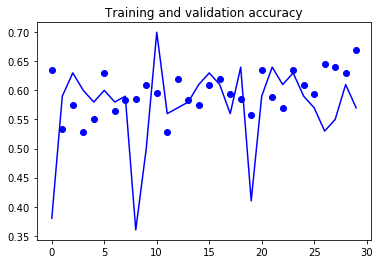

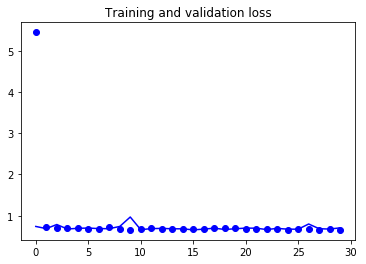

In [18]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [19]:
#Fitting the model using a batch generator

history = model.fit_generator(train_generator, steps_per_epoch=50, epochs = 30, 
                              validation_data= validation_generator, validation_steps=25)


history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv2_2.h5')

Epoch 1/30
50/50 [==============================] - 19s - loss: 0.6628 - acc: 0.5550 - val_loss: 0.6495 - val_acc: 0.6100
Epoch 2/30
50/50 [==============================] - 19s - loss: 0.6386 - acc: 0.6599 - val_loss: 0.7595 - val_acc: 0.5200
Epoch 3/30
50/50 [==============================] - 19s - loss: 0.6522 - acc: 0.6750 - val_loss: 0.7589 - val_acc: 0.5600
Epoch 4/30
50/50 [==============================] - 19s - loss: 0.6268 - acc: 0.6349 - val_loss: 0.7730 - val_acc: 0.5400
Epoch 5/30
50/50 [==============================] - 19s - loss: 0.6392 - acc: 0.6350 - val_loss: 0.6374 - val_acc: 0.5900
Epoch 6/30
50/50 [==============================] - 19s - loss: 0.6613 - acc: 0.6599 - val_loss: 0.8342 - val_acc: 0.5800
Epoch 7/30
50/50 [==============================] - 19s - loss: 0.6002 - acc: 0.6950 - val_loss: 0.7803 - val_acc: 0.5700
Epoch 8/30
50/50 [==============================] - 19s - loss: 0.6847 - acc: 0.5949 - val_loss: 0.6496 - val_acc: 0.5400
Epoch 9/30
50/50 [======

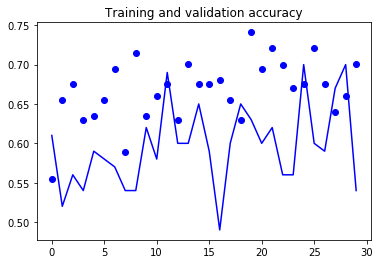

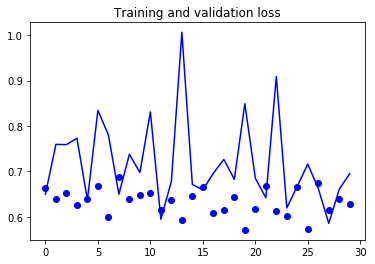

In [20]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()